# WORLD HAPPINESS REPORT

Submitted by: SINDHU SHREE N


Batch Number:1832

In [1]:
#importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

# Examining the Data:

In [2]:
df1=pd.read_csv('world_happiness.csv')
df1.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
df1.keys()

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [4]:
df1.shape

(158, 12)

we can see that there is 158 rows with 12 columns.

# Checking Null values in dataframe:

In [5]:
#To check null values
df1.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

From above observation we can notice that there is no null values.

In [6]:
# checking the datatype of each variables
df1.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

<AxesSubplot:>

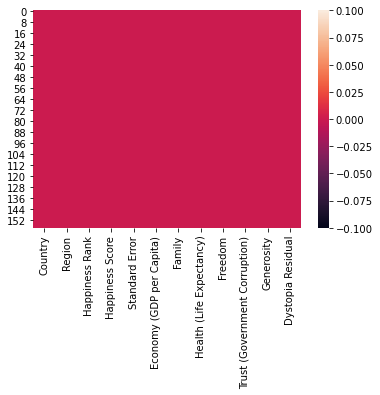

In [7]:
#checking null values using heatmap
sb.heatmap(df1.isnull())

In [8]:
#checking for unique countries
df1['Country'].unique

<bound method Series.unique of 0      Switzerland
1          Iceland
2          Denmark
3           Norway
4           Canada
          ...     
153         Rwanda
154          Benin
155          Syria
156        Burundi
157           Togo
Name: Country, Length: 158, dtype: object>

So there are many countries.

In [9]:
#counting the countries
df1['Country'].value_counts()

Senegal      1
Liberia      1
Thailand     1
Ghana        1
Cameroon     1
            ..
Serbia       1
Qatar        1
Guatemala    1
Pakistan     1
Austria      1
Name: Country, Length: 158, dtype: int64

In [10]:
#checking for unique region
df1['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [11]:
#counting the region
df1['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64

Since the country and region is a object datatype we can consider only float datatype from here onwards inorder to perform statistical operations and EDA process.

To check and remove skewness and outliers from here let us consider only continuos data columns. Since we cannot perform those opertions on the categorical data or ordinal columns(here Country and Region columns)

In [12]:
df=df1.iloc[:,-10:]
df

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


# Describing Datasets:

In [13]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


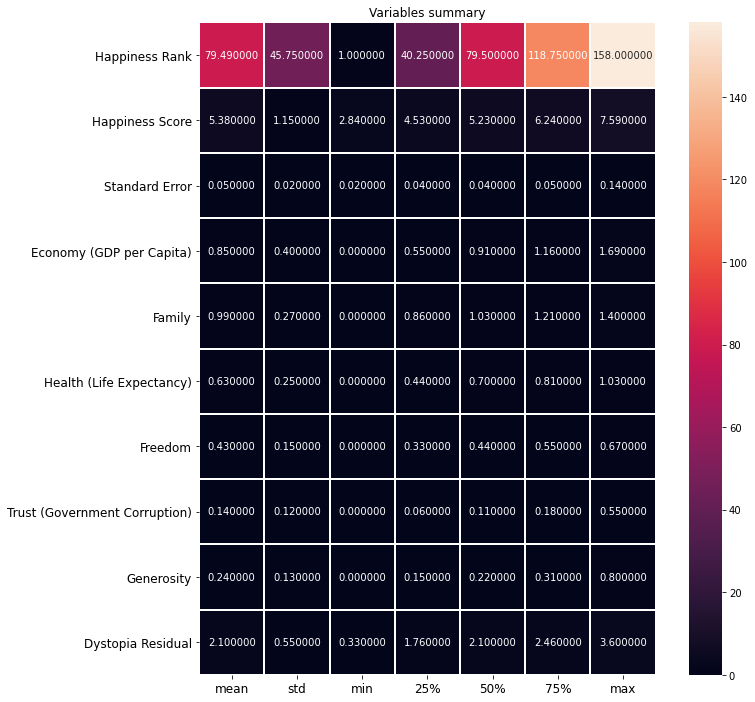

In [14]:
figure=plt.figure(figsize=(8,7))
figure.set_size_inches(12, 12)
sb.heatmap(round(df.describe()[1:].transpose(),2),linewidth=1,annot=True,fmt="f",square=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()

# Outcome of describe of datasets:

From the above we can determine the  mean, standard deviation, minimum and maximum value of each column. It helps us further in data cleaning.

Happiness Rank:
    
    Mean=79.493671
    Std=45.7523363
    min_value=1.000000
    max_value=158.000000

Happiness Score:
    
    Mean=5.375734
    std=1.145010
    min_value=2.839000
    max_value=7.587000

Standard Error:
    
    Mean=0.047885
    std=0.017146
    min_value=0.018480
    max_value=0.136930

Economy(GDP per Capita):
    
    Mean=0.846137
    std=0.403121
    min_value=0.000000
    max_value=1.690420

Family:
    
    Mean=0.991046
    std=0.272369
    min_value=0.000000
    max_value=1.402230


Health(Life Expectancy):
    
    Mean=0.630259
    std=0.247078
    min_value=0.000000
    max_value=1.025250

Freedom:
    
    Mean=0.428615
    std=0.150693
    min_value=0.000000
    max_value=0.669730

Trust(Government Corruption):
    
    Mean=0.143422
    std=0.120034
    min_value=0.000000
    max_value=0.551910

Generosity:
    
    Mean=0.237296
    std=0.126685
    min_value=0.000000
    max_value=0.795880

Dystopia Residual:
    
    Mean=2.098977
    std=0.553550
    min_value=0.328580
    max-value=3.602140

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Rank                 158 non-null    int64  
 1   Happiness Score                158 non-null    float64
 2   Standard Error                 158 non-null    float64
 3   Economy (GDP per Capita)       158 non-null    float64
 4   Family                         158 non-null    float64
 5   Health (Life Expectancy)       158 non-null    float64
 6   Freedom                        158 non-null    float64
 7   Trust (Government Corruption)  158 non-null    float64
 8   Generosity                     158 non-null    float64
 9   Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 12.5 KB


So now we are having all the data of numeric type.

# Outliers Checking:

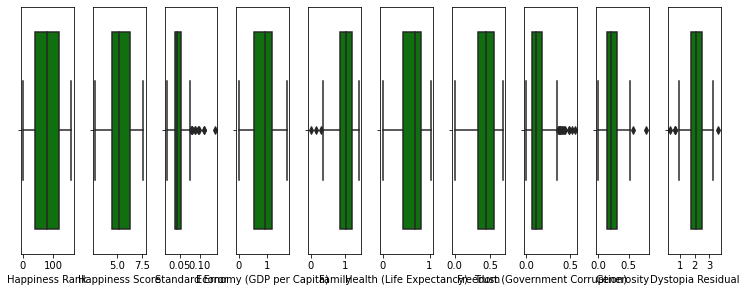

In [16]:
collist=df.columns.values
ncol=60
nrows=45
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sb.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

Fom the above outcome we can see that columns "Standard Error", "Family", "Trust(Government Corruption)", "Genorosity","Dispotia Residual" has the outliers.

# Skewness:

In [17]:
#checking skewness
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

Outcome of the skewness: The column which are having skewness:

    Standard Error
    Family
    Health(Life Expectancy)
    Trust
    Generosity

# Exploratory Data Analysis:

Univariate analysis

<AxesSubplot:xlabel='Country', ylabel='count'>

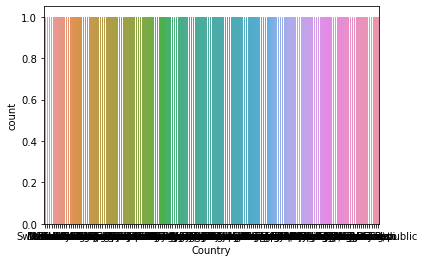

In [18]:
#plotting for Country
sb.countplot(df1['Country'])

<AxesSubplot:xlabel='Region', ylabel='count'>

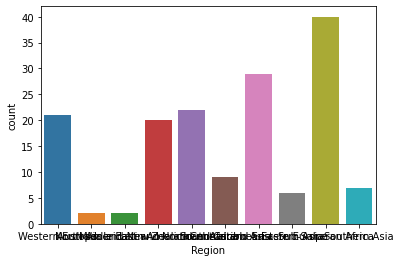

In [19]:
#plotting for Region
sb.countplot(df1['Region'])

# Normal Distribution Curve: 

<AxesSubplot:xlabel='Happiness Rank', ylabel='Density'>

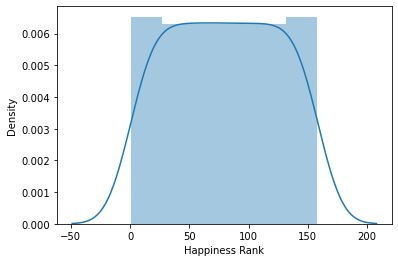

In [20]:
sb.distplot(df['Happiness Rank'])

The data is not normalised. The building blocks is out of the normalized curve.

<AxesSubplot:xlabel='Standard Error', ylabel='Density'>

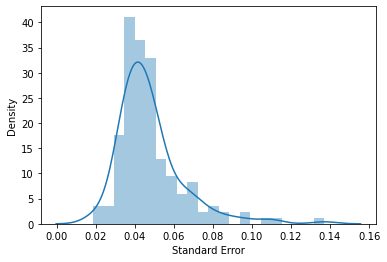

In [21]:
sb.distplot(df['Standard Error'])

The data is not normalised. The building blocks is out of the normalized curve.

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Density'>

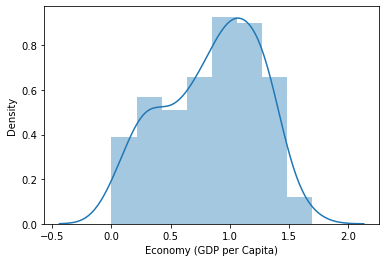

In [22]:
sb.distplot(df['Economy (GDP per Capita)'])

The data is not normalised. The building blocks is out of the normalized curve.

<AxesSubplot:xlabel='Family', ylabel='Density'>

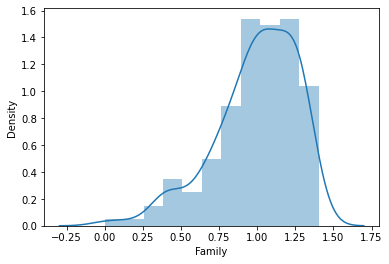

In [23]:
sb.distplot(df['Family'])

The data is not normalised. The building blocks is out of the normalized curve.

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Density'>

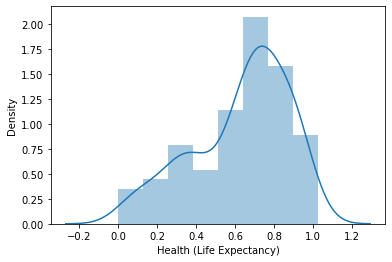

In [24]:
sb.distplot(df['Health (Life Expectancy)'])

The data is not normalised. The building blocks is out of the normalized curve.

<AxesSubplot:xlabel='Freedom', ylabel='Density'>

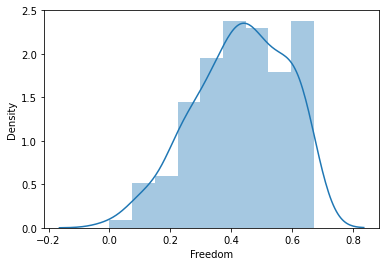

In [25]:
sb.distplot(df['Freedom'])

The data is not normalised. The building blocks is out of the normalized curve.

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Density'>

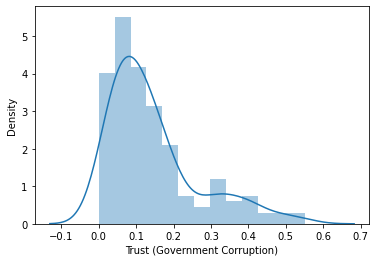

In [26]:
sb.distplot(df['Trust (Government Corruption)'])

The data is not normalised. The building blocks is out of the normalized curve.

<AxesSubplot:xlabel='Generosity', ylabel='Density'>

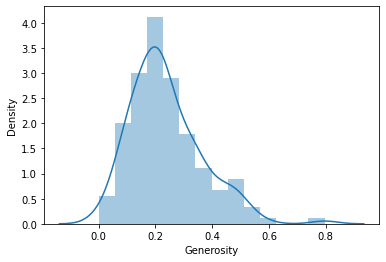

In [27]:
sb.distplot(df['Generosity'])

The data is not normalised. The building blocks is out of the normalized curve.

<AxesSubplot:xlabel='Dystopia Residual', ylabel='Density'>

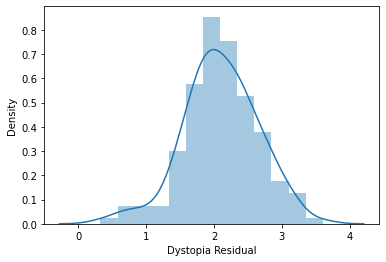

In [28]:
sb.distplot(df['Dystopia Residual'])

The data is not normalised. The building blocks is out of the normalized curve.

The normal distribution curve of Happiness score is irrelevant.

Happiness Rank                      AxesSubplot(0.125,0.536818;0.133621x0.343182)
Happiness Score                  AxesSubplot(0.285345,0.536818;0.133621x0.343182)
Standard Error                    AxesSubplot(0.44569,0.536818;0.133621x0.343182)
Economy (GDP per Capita)         AxesSubplot(0.606034,0.536818;0.133621x0.343182)
Family                           AxesSubplot(0.766379,0.536818;0.133621x0.343182)
Health (Life Expectancy)               AxesSubplot(0.125,0.125;0.133621x0.343182)
Freedom                             AxesSubplot(0.285345,0.125;0.133621x0.343182)
Trust (Government Corruption)        AxesSubplot(0.44569,0.125;0.133621x0.343182)
Generosity                          AxesSubplot(0.606034,0.125;0.133621x0.343182)
Dystopia Residual                   AxesSubplot(0.766379,0.125;0.133621x0.343182)
dtype: object

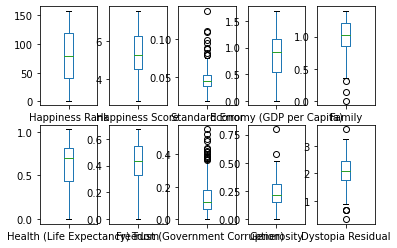

In [29]:
df.plot(kind='box', subplots=True, layout=(2,5))

# Checking the correlation of dataset

In [30]:
corr=df.corr()
corr

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


# Correlation using heatmap:

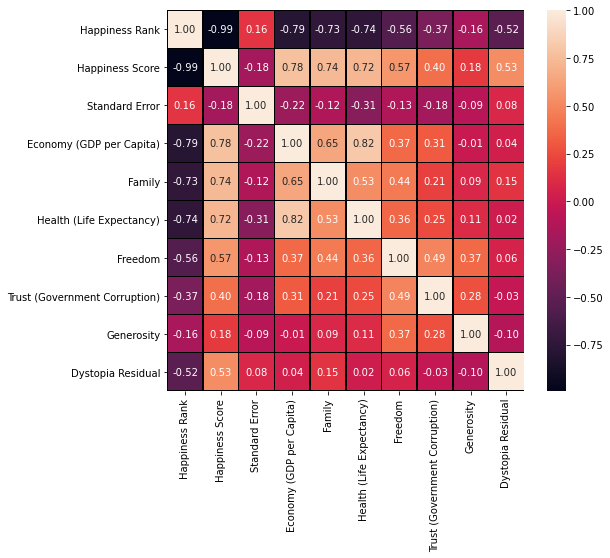

In [31]:
corr_hmap=df.corr()
plt.figure(figsize=(8,7))
sb.heatmap(corr_hmap,annot=True,linewidth=0.5,linecolor='black',fmt='.2f')
plt.show()

Here we can observe that Happiness Rank is having highly negative collinearity with Happiness score. Inorder to cross check it, let us plot the graph between them.  

Bivariate Analysis:

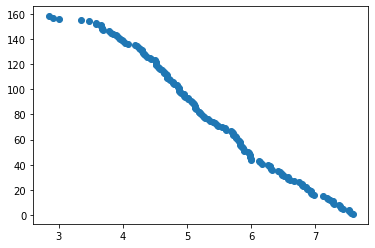

In [32]:
#scatter plot
plt.scatter(df['Happiness Score'],df['Happiness Rank'])

In the above graph we can see that Happiness Rank is negatively impacting the Happiness score so we can remove that column.

In [33]:
#dropping the column
df.drop('Happiness Rank',axis=1,inplace=True)

In [34]:
df.head()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


we can observe that "Happiness Rank" column is dropped.

# Removing Outliers:

In [35]:
#removing outliers
from scipy.stats import zscore
z=np.abs(zscore(df[['Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']]))
z.shape

(158, 9)

In [36]:
threshold=3
print(np.where(z>3))

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([6, 1, 1, 1, 7, 3, 6, 8, 3], dtype=int64))


In [37]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(158, 9)
(149, 9)


After removing outliers we can see that there is a reduction in number of rows.

# Calculating loss percentage of data: 

In [38]:
loss_percent=(158-149)/158*100
print(loss_percent)

5.69620253164557


Here the loss percent is 5.696 which does not impact much so that we can proceed further.

# Preparing the data:

In [39]:
x=df_new.iloc[:,-8:]
y=df_new.iloc[:,-9:-8]

In order to remove the skewness we need to assign x and y values.

# Removing skewness:

In [40]:
from sklearn.preprocessing import power_transform
power_transform(x,method='yeo-johnson')

array([[-0.95033703,  1.49245411,  1.65888016, ...,  1.81762514,
         0.65957855,  0.75525527],
       [ 0.37856182,  1.19406711,  2.00912496, ...,  0.32967608,
         1.56260401,  1.11116834],
       [-1.04140135,  1.26661161,  1.73078528, ...,  1.95339957,
         0.97722591,  0.70649452],
       ...,
       [-1.32081011, -1.36521585, -2.08738878, ..., -0.19284339,
         1.13425805, -0.32711524],
       [-0.69272644, -1.43304072, -2.01044293, ..., -0.4344978 ,
        -0.31207994, -0.93216364],
       [ 2.17876604, -1.93874732, -1.90641014, ..., -0.14727363,
        -0.17248608, -0.55359236]])

In [41]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.86678606,  1.38191593,  1.35787859, ...,  2.47225453,
         0.54630526,  0.7568764 ],
       [ 0.18566863,  1.13832385,  1.5678818 , ...,  0.00924715,
         1.71389767,  1.10929978],
       [-0.92608935,  1.19821973,  1.40197448, ...,  3.03674718,
         0.91963022,  0.70850719],
       ...,
       [-1.10042671, -1.40259581, -2.81135429, ..., -0.38241996,
         1.11805063, -0.32213507],
       [-0.69173419, -1.48837933, -2.60816264, ..., -0.53365337,
        -0.40922585, -0.9307015 ],
       [ 2.88218185, -2.19013866, -2.36115394, ..., -0.35206708,
        -0.28645792, -0.54943602]])

In [42]:
x.shape

(149, 8)

In [43]:
y.shape

(149, 1)

 Since our Target is "Happiness Score" which is continuous we need to use Linear Regression. For that  let us apply train_test_split technique to split the data into training and testing phases.

# Splitting the data and performing Linear Regression method:

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=150,test_size=0.33)

since my model is performing well in the random_state=150 I am considering it.

In [45]:
x_train.shape

(99, 8)

In [46]:
y_train.shape

(99, 1)

In [47]:
x_test.shape

(50, 8)

In [48]:
y_test.shape

(50, 1)

we can see that out of 149 rows, 99 rows are going into training phase and remaining 50 rows are going into testing phase.

In [49]:
lm=LinearRegression()

# Using fit and predict method:

In [50]:
lm.fit(x_train,y_train)

LinearRegression()

In [51]:
#finding the coefficient
lm.coef_

array([[1.02863998e-05, 3.86688561e-01, 2.51066096e-01, 2.45089843e-01,
        1.50210659e-01, 1.13077327e-01, 1.19548143e-01, 5.23897377e-01]])

We obtiained the coefficients of the data which is in a multi-linear equation form.

In [52]:
#finding the intercept
lm.intercept_

array([5.4296235])

In [53]:
# finding the accuracy_score
lm.score(x_train,y_train)

0.9999999419226022

In [55]:
pred=lm.predict(x_test)

Since score is 0.99 the  model is working 99% accuracy.

In [56]:
#printing the errors:
print("error:")

print('Mean absolute error:', mean_absolute_error(y_test,pred))
print('Mean squared error:', mean_squared_error(y_test,pred))

print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 0.0002584648564802094
Mean squared error: 9.711564712440554e-08
Root mean squared error: 0.0003116338350121911


We can see that mean absolute error and root mean squared error are very less and we are getting some error only in mean squared error. 

# Finding r2_score:

In [57]:
#r2 score --> coefficient of determination which is the proportion of the variance in the dependent variable that is predictable from the independent variable(S)
#i.e. change coming in y whenever x is being changed
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.9999999070816785


Thus, we are getting a good r2_score.

# Saving the best model:

In [58]:
import pickle
filename = 'Finalmodel.pkl'
pickle.dump(lm, open(filename,'wb'))

# Conclusion:

In [61]:
pred=lm.predict(x_test)
print("predicted Happiness Score:",pred[0:10])
print("actual Happiness Score",y_test[0:10].values)

predicted Happiness Score: [[5.8326468 ]
 [5.99509224]
 [3.78091378]
 [5.12320001]
 [5.75439602]
 [6.57397857]
 [7.18726105]
 [6.47665032]
 [5.36010542]
 [5.75853597]]
actual Happiness Score [[5.833]
 [5.995]
 [3.781]
 [5.123]
 [5.754]
 [6.574]
 [7.187]
 [6.477]
 [5.36 ]
 [5.759]]
